## Obtendo dados

- Recuperar N focos de queimadas para cada região do Brasil
    - Para cada foco, obter valores de risco, precipitação, temperatura e umidade para o dia do evento
- Explorar dados


In [63]:
# Recuperar N focos de queimadas para cada região do Brasil

from bdq import bdq;
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from IPython.display import display, HTML 
display(HTML("<style>.dataframe{font-size: 16px !important;}</style>"))


b = bdq(wfs_server="http://localhost:8080/geoserver-esensing/", wtss_server="http://localhost:7654")

# recupera 100 focos de cada regiao
N=100
fc_n, _ = b.feature_collection("esensing:focos_bra_2016", attributes=["timestamp","regiao","bioma"], filter="regiao='N'", max_features=N)
fc_ne, _ = b.feature_collection("esensing:focos_bra_2016", attributes=["timestamp","regiao","bioma"], filter="regiao='NE'", max_features=N)
fc_co, _ = b.feature_collection("esensing:focos_bra_2016", attributes=["timestamp","regiao","bioma"],filter="regiao='CO'", max_features=N)
fc_se, _ = b.feature_collection("esensing:focos_bra_2016", attributes=["timestamp","regiao","bioma"],filter="regiao='SE'", max_features=N)
fc_s, _ = b.feature_collection("esensing:focos_bra_2016", attributes=["timestamp","regiao","bioma"],filter="regiao='S'", max_features=N)

print("Done!")

Done!


In [64]:

fc = pd.concat([fc_n, fc_ne, fc_co, fc_se, fc_s], ignore_index=True)

display(fc[0:5])

,bioma,coordinates,regiao,timestamp
0,Cerrado,"[-47.607, -5.673]",N,2016-02-12T17:05:45Z
1,Cerrado,"[-47.606, -5.581]",N,2016-07-17T04:00:00Z
2,Cerrado,"[-47.734, -5.562]",N,2016-01-15T16:40:14Z
3,Cerrado,"[-47.605, -5.58]",N,2016-07-17T04:00:00Z
4,Cerrado,"[-47.606, -5.677]",N,2016-02-12T17:05:45Z


In [65]:
Para cada foco, obter valores de risco, precipitação, temperatura e umidade para o dia do evento

# Para cada foco, obtem o valor de risco, precipitação, temperatura e umidade para o dia da ocorrência
df = None
for index, row in fc.iterrows():
    s_date = datetime.strptime(row['timestamp'], "%Y-%m-%dT%H:%M:%SZ").strftime("%Y-%m-%d")
    ts, ts_metadata = b.time_series("rpth", ("risk","precipitation", "temperature", "humidity"), 
                                    row['coordinates'][1], row['coordinates'][0],
                                   start_date=s_date, end_date=s_date)
    ts['bioma'] = row['bioma']
    ts['regiao'] = row['regiao']
    if df is None:
        df = ts;
    else:
        df = pd.concat([df, ts],ignore_index=True)
print("Done!")

Done!


In [73]:
# Overview dos dados

df.describe()

,humidity,precipitation,risk,temperature
count,500.000000,500.000000,5.000000e+02,500.000000
mean,0.466825,0.526755,1.595074e+35,302.156276
std,0.169938,1.618500,1.252140e+36,3.564922
min,0.189088,0.000000,1.050332e-02,289.603638
25%,0.313003,0.000000,8.707557e-01,300.386932
50%,0.459480,0.000000,1.000000e+00,301.858978
75%,0.605774,0.000000,1.000000e+00,304.695923
max,0.990000,12.921455,9.969210e+36,310.614410


In [75]:
# Excluindo valores do data frame

df_c = df[df['risk']<=1]
df_c.describe()

,humidity,precipitation,risk,temperature
count,492.000000,492.000000,492.000000,492.000000
mean,0.469881,0.535316,0.825136,302.158123
std,0.169346,1.630225,0.319686,3.585457
min,0.189088,0.000000,0.010503,289.603638
25%,0.321597,0.000000,0.867803,300.386688
50%,0.463720,0.000000,1.000000,301.898254
75%,0.605774,0.000000,1.000000,304.695923
max,0.990000,12.921455,1.000000,310.614410


In [109]:
# importando e configurando módulos de plotagem

import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


fig_size = (16,5)

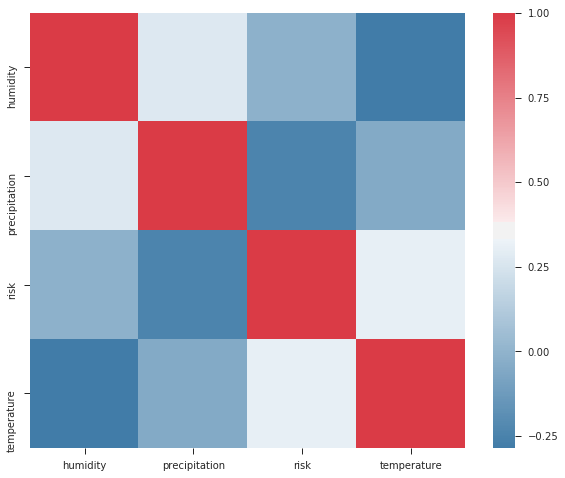

In [110]:
# Gerando matrix de correlação
f, ax = plt.subplots(figsize=(10, 8))
corr = df_c.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240, 10,  as_cmap=True),
            square=True, ax=ax)


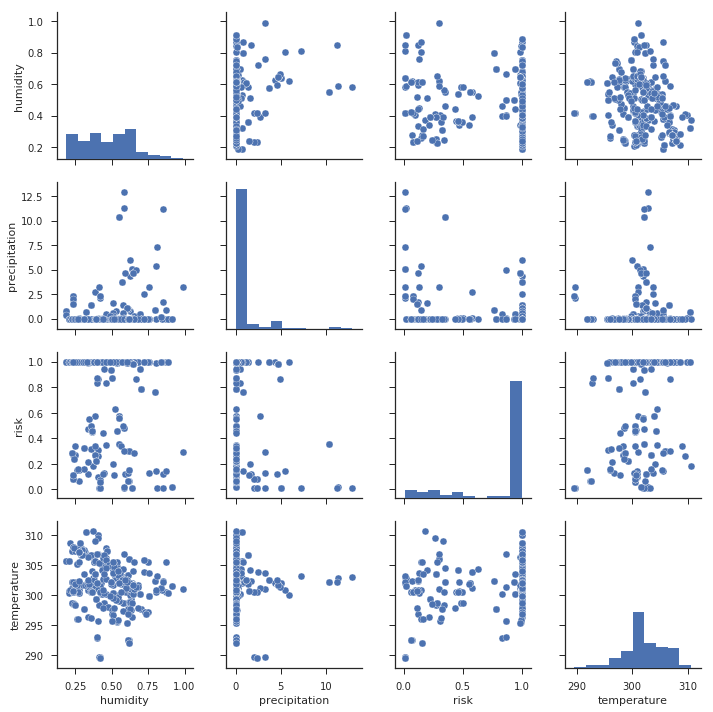

In [111]:
# Gerando scatterplot matrix
sns.pairplot(df_c)

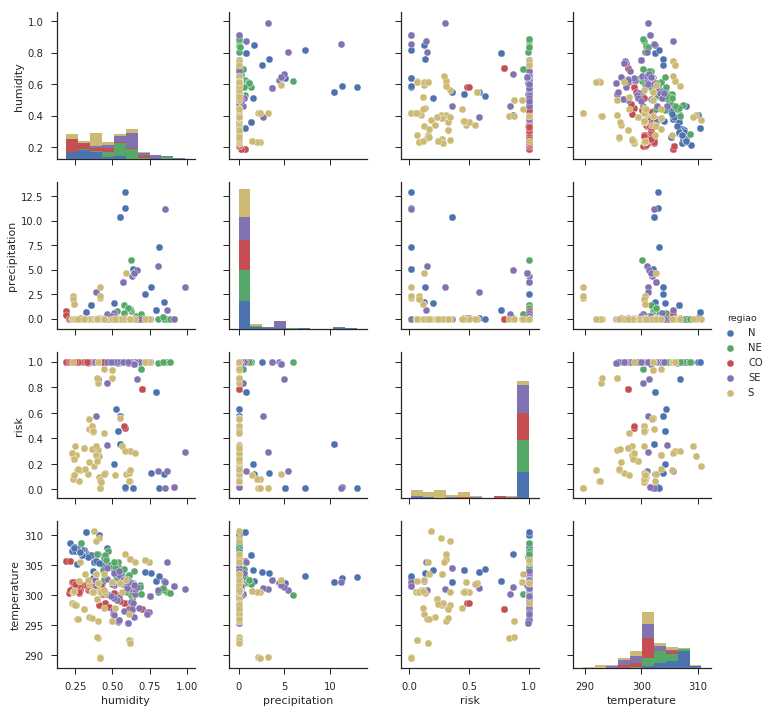

In [112]:
# Gerando scatterplot matrix por região
sns.pairplot(df_c, hue="regiao")

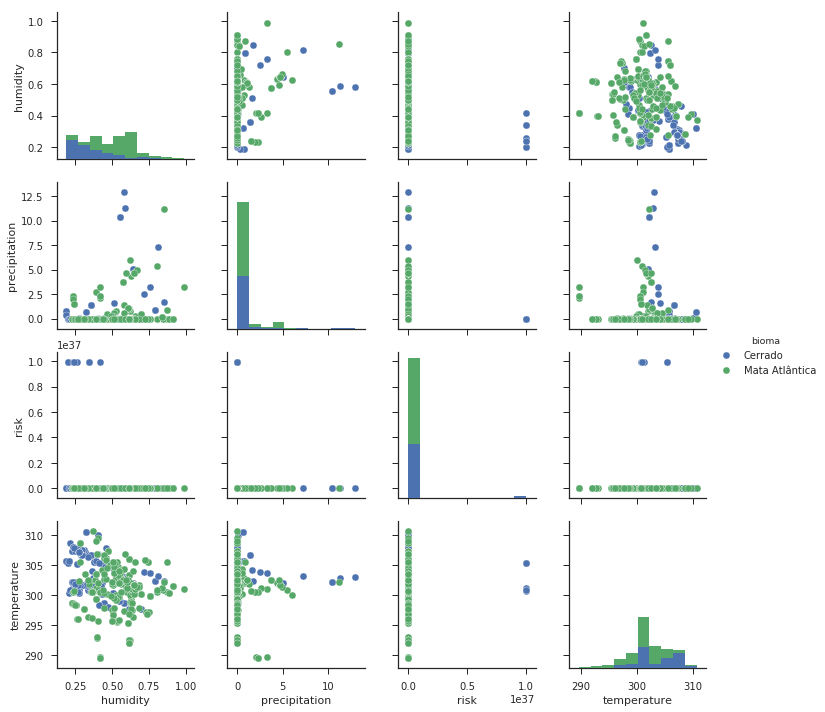

In [113]:
# Gerando scatterplot matrix por bioma
sns.pairplot(df, hue="bioma")

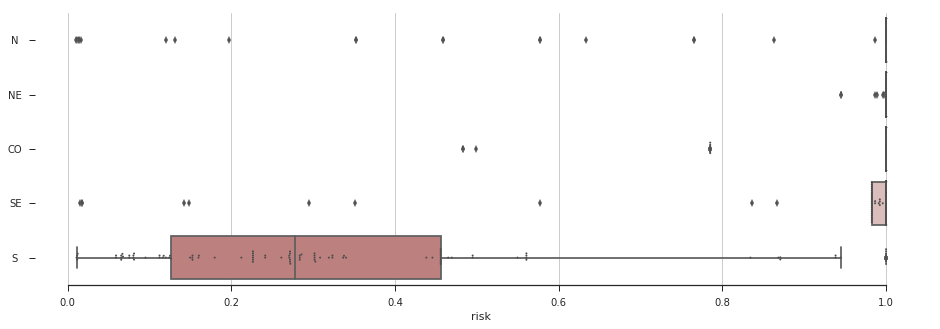

In [126]:
# Gerando boxplot para risco por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="risk", y="regiao", data=df_c, palette="vlag")
sns.swarmplot(x="risk", y="regiao", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

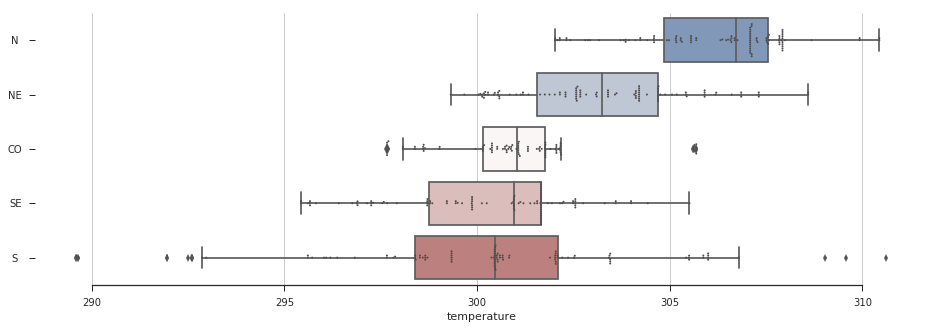

In [129]:
# Gerando boxplot para temperatura por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="temperature", y="regiao", data=df_c, palette="vlag")
sns.swarmplot(x="temperature", y="regiao", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

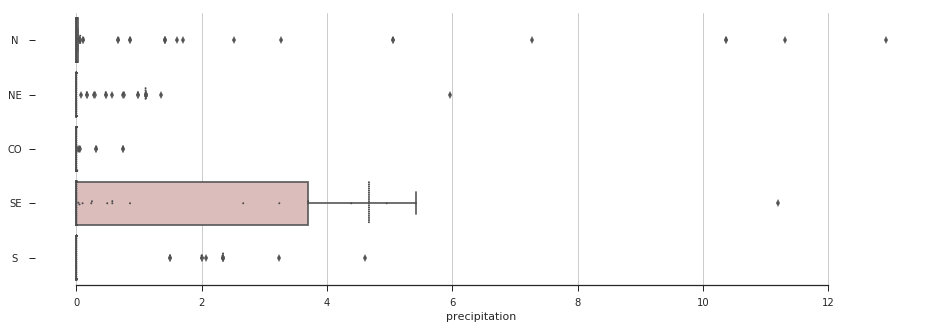

In [130]:
# Gerando boxplot para precipitação por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="precipitation", y="regiao", data=df_c, palette="vlag")
sns.swarmplot(x="precipitation", y="regiao", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

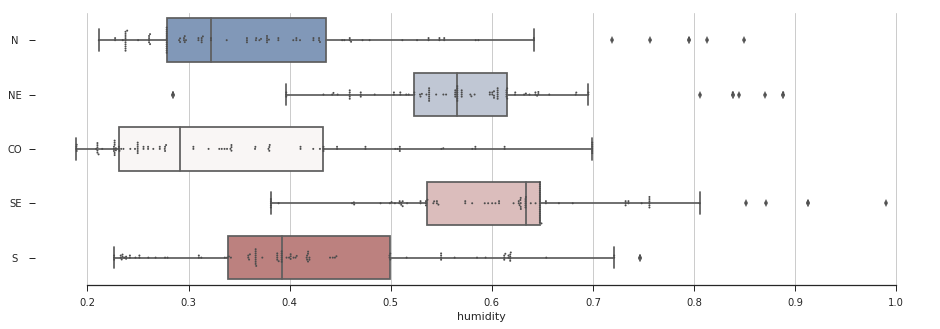

In [132]:
# Gerando boxplot para umidade por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax, x="humidity", y="regiao", data=df_c, palette="vlag")
sns.swarmplot(x="humidity", y="regiao", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

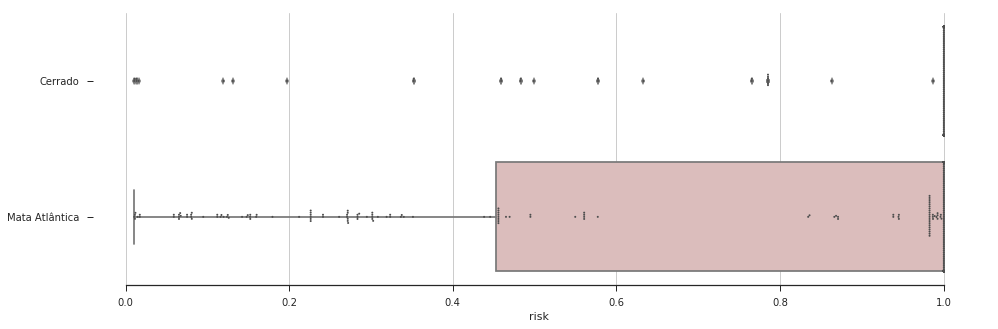

In [119]:
# Gerando boxplot para risco por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax,x="risk", y="bioma", data=df_c, palette="vlag")
sns.swarmplot(x="risk", y="bioma", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

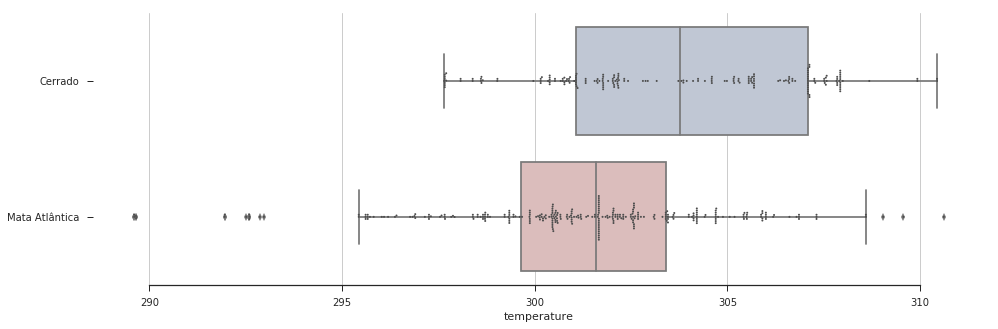

In [133]:
# Gerando boxplot para temperatura por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax,x="temperature", y="bioma", data=df_c, palette="vlag")
sns.swarmplot(x="temperature", y="bioma", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

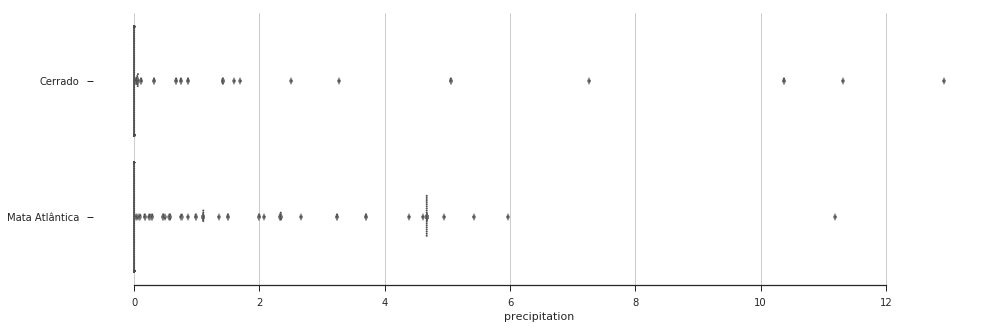

In [134]:
# Gerando boxplot para precipitação por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax,x="precipitation", y="bioma", data=df_c, palette="vlag")
sns.swarmplot(x="precipitation", y="bioma", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

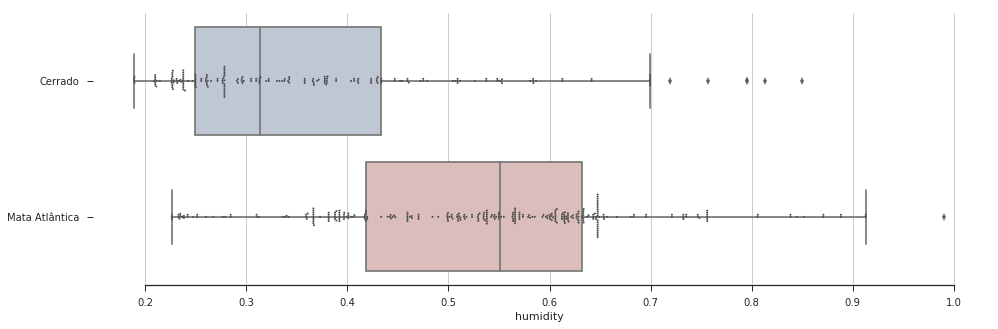

In [135]:
# Gerando boxplot para umidade por região
fig, ax = plt.subplots(figsize=fig_size)
sns.boxplot(ax=ax,x="humidity", y="bioma", data=df_c, palette="vlag")
sns.swarmplot(x="humidity", y="bioma", data=df_c, size=2, color=".3", linewidth=0)
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [184]:
x = df_c[df_c['regiao']=="S "]
display(len(x))

#display(df_c[1:10])

100

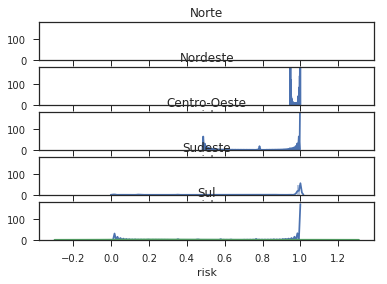

In [239]:
# Hexbin plots
#sns.axes_style("white")
#sns.jointplot(x="risk", y="humidity",data=df_c)
from scipy import stats, integrate

f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, sharex=True, sharey=True)
ax1.set_title("Norte")
sns.distplot(df_c[df_c['regiao']=="N "]["risk"], ax=ax1);
ax2.set_title("Nordeste")
sns.distplot(df_c[df_c['regiao']=="NE"]["risk"], ax=ax2);
ax3.set_title("Centro-Oeste")
sns.distplot(df_c[df_c['regiao']=="CO"]["risk"], ax=ax3);
ax4.set_title("Sudeste")
sns.distplot(df_c[df_c['regiao']=="SE"]["risk"], ax=ax4);
ax5.set_title("Sul")
sns.distplot(df_c[df_c['regiao']=="S "]["risk"], ax=ax5);
#plt.subplots_adjust(hspace=1, top=3, right=1.5)

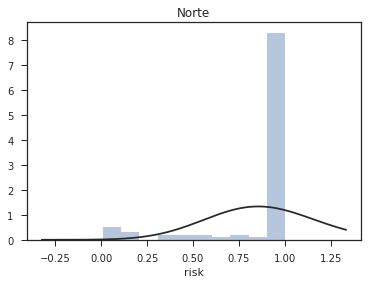

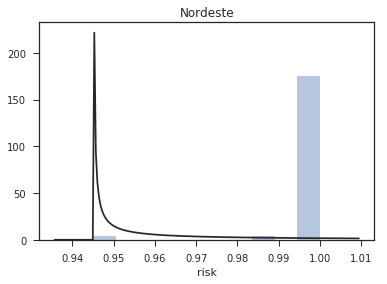

In [253]:
# Hexbin plots
#sns.axes_style("white")
#sns.jointplot(x="risk", y="humidity",data=df_c)
from scipy import stats, integrate

plt.title("Norte")
sns.distplot(df_c[df_c['regiao']=="N "]["risk"], kde=False, fit=stats.gamma);
plt.figure()
plt.title("Nordeste")
sns.distplot(df_c[df_c['regiao']=="NE"]["risk"], kde=False, fit=stats.gamma);
